<a href="https://colab.research.google.com/github/Anupa-123/GTD-Data-Analysis/blob/main/Global_Terrorism_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

In [62]:
#fundamental libraries
import pandas as pd
import numpy as np

#visualization libraries
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import plotly.express as px

#setting up the background style for the plots
plt.style.use('fivethirtyeight')

#for interactivity
from ipywidgets import interact, interact_manual

%matplotlib inline

In [63]:
#mounting google derive

from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [64]:
path = '/content/drive/MyDrive/Global Terrorism Data.csv'

In [65]:
#Loading the Global Terrorism Dataset

df = pd.read_csv('/content/drive/MyDrive/Global Terrorism Data.csv', encoding='latin-1')


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [66]:
#shape of the dataset
df.shape

(181691, 135)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [68]:
df.columns.to_list()

['eventid',
 'iyear',
 'imonth',
 'iday',
 'approxdate',
 'extended',
 'resolution',
 'country',
 'country_txt',
 'region',
 'region_txt',
 'provstate',
 'city',
 'latitude',
 'longitude',
 'specificity',
 'vicinity',
 'location',
 'summary',
 'crit1',
 'crit2',
 'crit3',
 'doubtterr',
 'alternative',
 'alternative_txt',
 'multiple',
 'success',
 'suicide',
 'attacktype1',
 'attacktype1_txt',
 'attacktype2',
 'attacktype2_txt',
 'attacktype3',
 'attacktype3_txt',
 'targtype1',
 'targtype1_txt',
 'targsubtype1',
 'targsubtype1_txt',
 'corp1',
 'target1',
 'natlty1',
 'natlty1_txt',
 'targtype2',
 'targtype2_txt',
 'targsubtype2',
 'targsubtype2_txt',
 'corp2',
 'target2',
 'natlty2',
 'natlty2_txt',
 'targtype3',
 'targtype3_txt',
 'targsubtype3',
 'targsubtype3_txt',
 'corp3',
 'target3',
 'natlty3',
 'natlty3_txt',
 'gname',
 'gsubname',
 'gname2',
 'gsubname2',
 'gname3',
 'gsubname3',
 'motive',
 'guncertain1',
 'guncertain2',
 'guncertain3',
 'individual',
 'nperps',
 'nperpcap',
 

In [69]:
#let's create copy of original data and select necessary features for further analysis
column_list = ['iyear','imonth','iday','country_txt','region_txt','provstate','city','longitude','latitude', 
      'location','summary','success','alternative_txt','suicide','attacktype1_txt','targtype1_txt','targsubtype1_txt','corp1','natlty1_txt','gname','weaptype1_txt','nkill','nwound']


In [70]:
df = df[column_list]

In [71]:
df.head()

,iyear,imonth,iday,country_txt,region_txt,provstate,city,longitude,latitude,location,...,suicide,attacktype1_txt,targtype1_txt,targsubtype1_txt,corp1,natlty1_txt,gname,weaptype1_txt,nkill,nwound
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,-69.951164,18.456792,NaN,...,0,Assassination,Private Citizens & Property,Named Civilian,NaN,Dominican Republic,MANO-D,Unknown,1.0,0.0
1,1970,0,0,Mexico,North America,Federal,Mexico city,-99.086624,19.371887,NaN,...,0,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,Belgium,23rd of September Communist League,Unknown,0.0,0.0
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,120.599741,15.478598,NaN,...,0,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Voice of America,United States,Unknown,Unknown,1.0,0.0
3,1970,1,0,Greece,Western Europe,Attica,Athens,23.762728,37.997490,NaN,...,0,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,NaN,United States,Unknown,Explosives,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,130.396361,33.580412,NaN,...,0,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,NaN,United States,Unknown,Incendiary,NaN,NaN


In [72]:
#display the last observations
df.tail()

,iyear,imonth,iday,country_txt,region_txt,provstate,city,longitude,latitude,location,...,suicide,attacktype1_txt,targtype1_txt,targsubtype1_txt,corp1,natlty1_txt,gname,weaptype1_txt,nkill,nwound
181686,2017,12,31,Somalia,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,45.385034,2.359673,The incident occurred near the town of Balcad.,...,0,Armed Assault,Military,Military Checkpoint,Somali National Army (SNA),Somalia,Al-Shabaab,Firearms,1.0,2.0
181687,2017,12,31,Syria,Middle East & North Africa,Lattakia,Jableh,35.942679,35.407278,The incident occurred at the Humaymim Airport.,...,0,Bombing/Explosion,Military,Military Barracks/Base/Headquarters/Checkpost,Russian Air Force,Russia,Muslim extremists,Explosives,2.0,7.0
181688,2017,12,31,Philippines,Southeast Asia,Maguindanao,Kubentog,124.437908,6.900742,The incident occurred in the Datu Hoffer distr...,...,0,Facility/Infrastructure Attack,Private Citizens & Property,House/Apartment/Residence,Not Applicable,Philippines,Bangsamoro Islamic Freedom Movement (BIFM),Incendiary,0.0,0.0
181689,2017,12,31,India,South Asia,Manipur,Imphal,93.940430,24.798346,The incident occurred in the Mantripukhri neig...,...,0,Bombing/Explosion,Government (General),Government Building/Facility/Office,Forest Department Manipur,India,Unknown,Explosives,0.0,0.0
181690,2017,12,31,Philippines,Southeast Asia,Maguindanao,Cotabato City,124.241966,7.209594,NaN,...,0,Bombing/Explosion,Unknown,NaN,Unknown,Philippines,Unknown,Explosives,0.0,0.0


In [73]:
df.rename({'iyear':'year','imonth':'month','iday':'day','country_txt':'country','region_txt':'region','provstate':'province' ,'attacktype1_txt':'attack_type','targtype1_txt':'target','targsubtype1_txt':'sub_target','corp1':'corporation', 
           'natlty1_txt':'nationality','gname':'terrorist_group','weaptype1_txt':'weapon','nkill':'killed','nwound':'wounded'},axis = 1,inplace=True)

In [74]:
df=df[['year','month','day','country','region','city','province','attack_type','target','sub_target','corporation',
      'nationality','terrorist_group','weapon','killed','wounded','success']]

In [75]:
#let's check for missing values
df.isna().mean().round(4)*100

year                0.00
month               0.00
day                 0.00
country             0.00
region              0.00
city                0.24
province            0.23
attack_type         0.00
target              0.00
sub_target          5.71
corporation        23.42
nationality         0.86
terrorist_group     0.00
weapon              0.00
killed              5.68
wounded             8.98
success             0.00
dtype: float64

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   year             181691 non-null  int64  
 1   month            181691 non-null  int64  
 2   day              181691 non-null  int64  
 3   country          181691 non-null  object 
 4   region           181691 non-null  object 
 5   city             181257 non-null  object 
 6   province         181270 non-null  object 
 7   attack_type      181691 non-null  object 
 8   target           181691 non-null  object 
 9   sub_target       171318 non-null  object 
 10  corporation      139141 non-null  object 
 11  nationality      180132 non-null  object 
 12  terrorist_group  181691 non-null  object 
 13  weapon           181691 non-null  object 
 14  killed           171378 non-null  float64
 15  wounded          165380 non-null  float64
 16  success          181691 non-null  int6

In [77]:
df.describe()

,year,month,day,killed,wounded,success
count,181691.000000,181691.000000,181691.000000,171378.000000,165380.000000,181691.000000
mean,2002.638997,6.467277,15.505644,2.403272,3.167668,0.889598
std,13.259430,3.388303,8.814045,11.545741,35.949392,0.313391
min,1970.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,0.000000,0.000000,1.000000
50%,2009.000000,6.000000,15.000000,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,2.000000,2.000000,1.000000
max,2017.000000,12.000000,31.000000,1570.000000,8191.000000,1.000000


In [78]:
#it's not correct to impute missing names. So let's drop
df.dropna(axis=0, how= 'any' , inplace=True)

In [79]:
#drop columns contains unknown
df.drop(df.columns[df.columns.str.contains('Unknown',case = False)],axis = 1, inplace = True)

In [80]:
df.dtypes

year                 int64
month                int64
day                  int64
country             object
region              object
city                object
province            object
attack_type         object
target              object
sub_target          object
corporation         object
nationality         object
terrorist_group     object
weapon              object
killed             float64
wounded            float64
success              int64
dtype: object

In [81]:
df.shape

(120282, 17)

**Now let's change the column data type.**

In [82]:
# Passed a dictionary to astype() function
df = df.astype({"country":'category', "region":'category', "city":'category', "province": 'category', "attack_type": 'category', "target": 'category',
                  "corporation":'category', "nationality":'category', "terrorist_group":'category',
                   "weapon": 'category',"sub_target":'category',"killed":'int64',"wounded":'int64'})
  
# Now print the data type 
# of all columns after change
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120282 entries, 1 to 181689
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   year             120282 non-null  int64   
 1   month            120282 non-null  int64   
 2   day              120282 non-null  int64   
 3   country          120282 non-null  category
 4   region           120282 non-null  category
 5   city             120282 non-null  category
 6   province         120282 non-null  category
 7   attack_type      120282 non-null  category
 8   target           120282 non-null  category
 9   sub_target       120282 non-null  category
 10  corporation      120282 non-null  category
 11  nationality      120282 non-null  category
 12  terrorist_group  120282 non-null  category
 13  weapon           120282 non-null  category
 14  killed           120282 non-null  int64   
 15  wounded          120282 non-null  int64   
 16  success          120

**Univariate Variable Analysis**

**City which had maximum number of attacks.**

In [83]:
city=df["city"].value_counts()[1:15]
city

Baghdad         5885
Karachi         2174
Mosul           1652
Mogadishu       1212
Lima            1117
Belfast          765
Benghazi         757
Kirkuk           740
Santiago         703
Istanbul         642
San Salvador     611
Athens           611
Quetta           608
Kabul            597
Name: city, dtype: int64

**Visualizing the data**

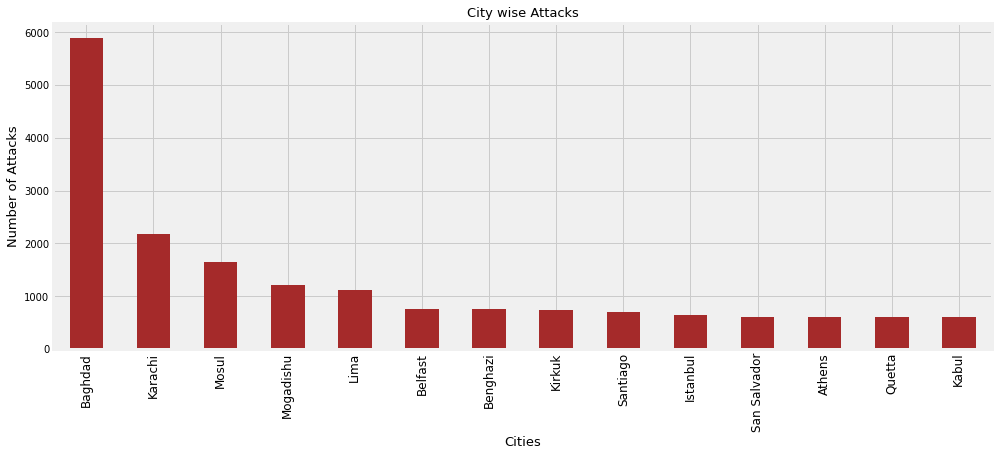

In [84]:
city.plot(kind="bar",color="brown",figsize=(15,6))
plt.title("City wise Attacks",fontsize=13)
plt.xlabel("Cities",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()

**Insight:** It has been seen that city Baghdad had most attcaked.

**Target area which had maximum number of attacked**

In [85]:
df['target'].value_counts()

Private Citizens & Property       27012
Military                          21163
Police                            20639
Government (General)              16701
Business                          10259
Transportation                     3918
Utilities                          3334
Religious Figures/Institutions     3241
Educational Institution            3014
Terrorists/Non-State Militia       2416
Government (Diplomatic)            2292
Journalists & Media                1863
Violent Political Party            1757
Airports & Aircraft                 701
NGO                                 688
Telecommunication                   511
Tourists                            226
Food or Water Supply                168
Maritime                            162
Abortion Related                    127
Other                                90
Name: target, dtype: int64

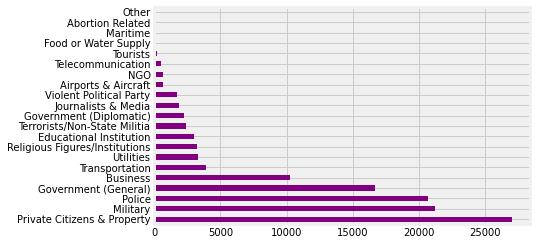

In [86]:
df['target'].value_counts().plot(kind = "barh", color = "purple")

**Insight:**Private Citizens & Property 27012 had most attacked.

**How much success rate of attack**

In [87]:
success_rate=sum(df['success'])/len(df['success'])*100
print(success_rate)

89.36748640694368


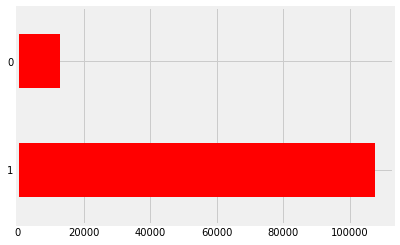

In [88]:
df['success'].value_counts().plot(kind = "barh", color = "red")

**Which nationality exposed most attacks**

In [89]:
print('Nationality exposed most attacks:', df['nationality'].value_counts())
df['nationality'].value_counts()

Nationality exposed most attacks: Iraq                18882
Pakistan            10557
Afghanistan          9092
India                8802
Philippines          5087
                    ...  
Martinique              1
St. Lucia               1
St. Martin              1
Tuvalu                  1
Marshall Islands        1
Name: nationality, Length: 210, dtype: int64


Iraq                18882
Pakistan            10557
Afghanistan          9092
India                8802
Philippines          5087
                    ...  
Martinique              1
St. Lucia               1
St. Martin              1
Tuvalu                  1
Marshall Islands        1
Name: nationality, Length: 210, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


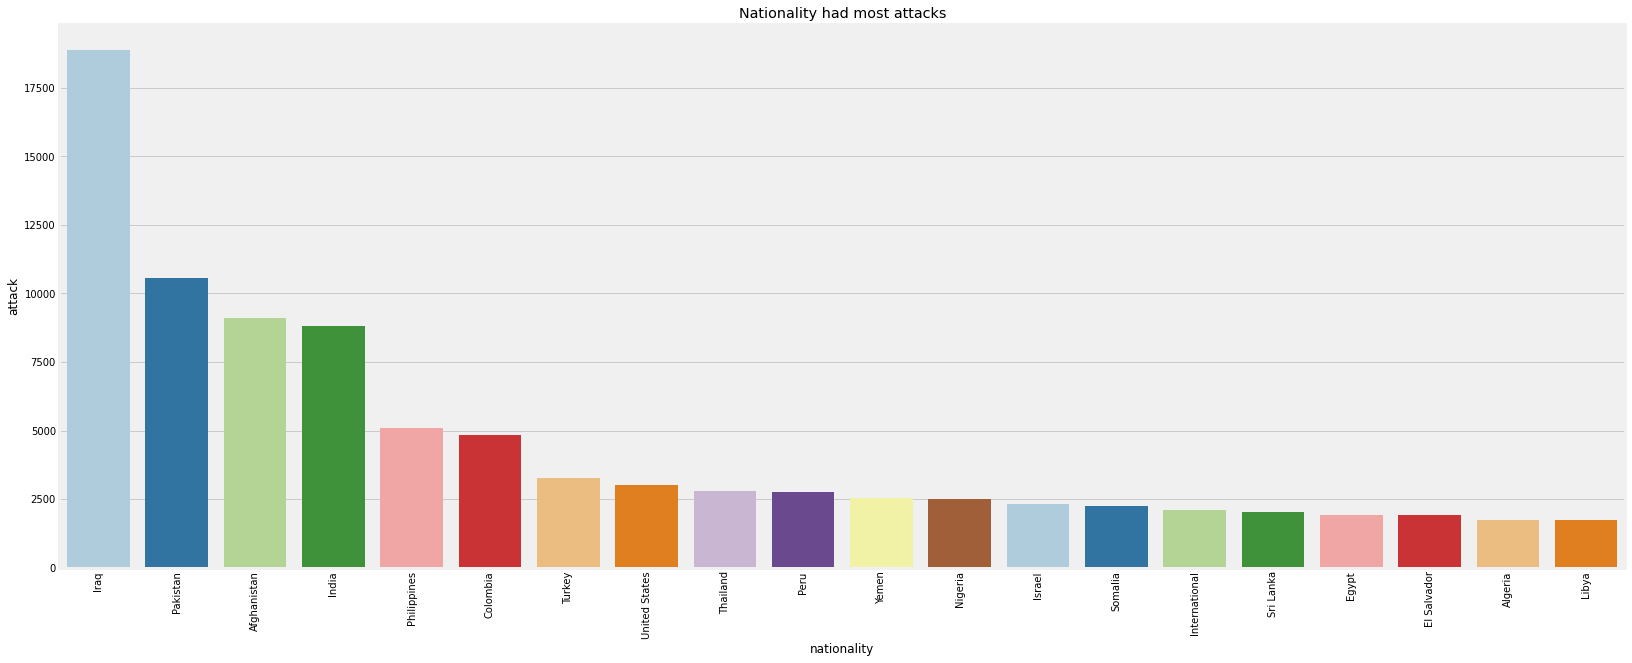

In [90]:
plt.figure(figsize = (25,10))
sns.countplot(df['nationality'],
              order = df['nationality'].value_counts().index[:20],
              palette = sns.color_palette("Paired"))
plt.xlabel('nationality')
plt.ylabel('attack')
plt.title('Nationality had most attacks')
plt.xticks(rotation = 90)
plt.show()

**Insight:** Nationality which exposed most attacked was Iraq.

**Maximum attack on the basis of weapon type**

In [91]:
print('Maximum attack on the basis of weapon:', df['weapon'].value_counts().index[0])
df['weapon'].value_counts()

Maximum attack on the basis of weapon: Explosives


Explosives                                                                     60550
Firearms                                                                       41400
Unknown                                                                         8741
Incendiary                                                                      6475
Melee                                                                           2496
Chemical                                                                         247
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      118
Sabotage Equipment                                                                97
Other                                                                             89
Fake Weapons                                                                      31
Biological                                                                        27
Radiological                                                     

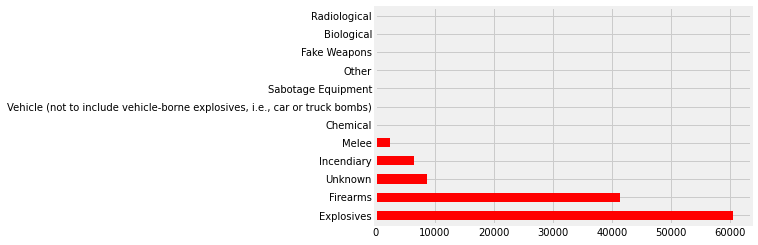

In [92]:
df['weapon'].value_counts().plot(kind = "barh", color = "red")

**Insight:** Maximum attacked on the basis of weapon was Explosives 60550

**Maximum attack on the basis of country**

In [93]:
print('Maximum attack on the basis of country:', df['country'].value_counts().index[0])
df['country'].value_counts()

Maximum attack on the basis of country: Iraq


Iraq                 19291
Pakistan             10870
Afghanistan          10085
India                 8661
Philippines           5239
                     ...  
South Vietnam            1
International            1
St. Lucia                1
Equatorial Guinea        1
South Yemen              1
Name: country, Length: 199, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


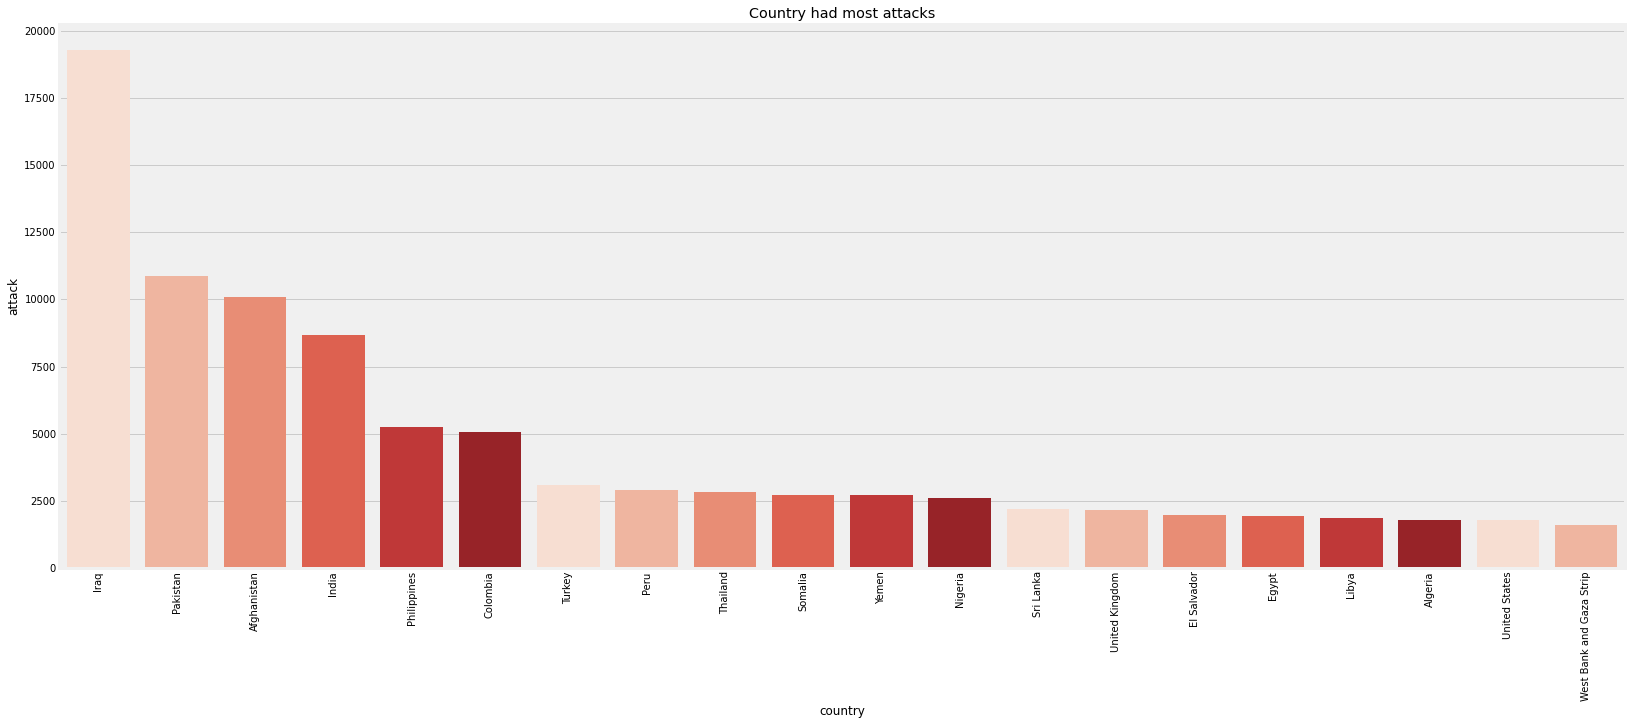

In [94]:
plt.figure(figsize = (25,10))
sns.countplot(df['country'],
              order = df['country'].value_counts().index[:20],
              palette = sns.color_palette("Reds"))
plt.xlabel('country')
plt.ylabel('attack')
plt.title('Country had most attacks')
plt.xticks(rotation = 90)
plt.show()

**Insight:** Maximum attacked on the basis of country was Iraq.

**Maximum attack on the basis of region**

In [95]:
region = df.region.value_counts().to_frame().reset_index()
region.columns = ['region', 'attack_type']
df['region'].value_counts()

Middle East & North Africa     37262
South Asia                     34039
Sub-Saharan Africa             11139
South America                  10187
Southeast Asia                  9398
Western Europe                  7076
Central America & Caribbean     4059
Eastern Europe                  3888
North America                   2198
East Asia                        509
Central Asia                     334
Australasia & Oceania            193
Name: region, dtype: int64

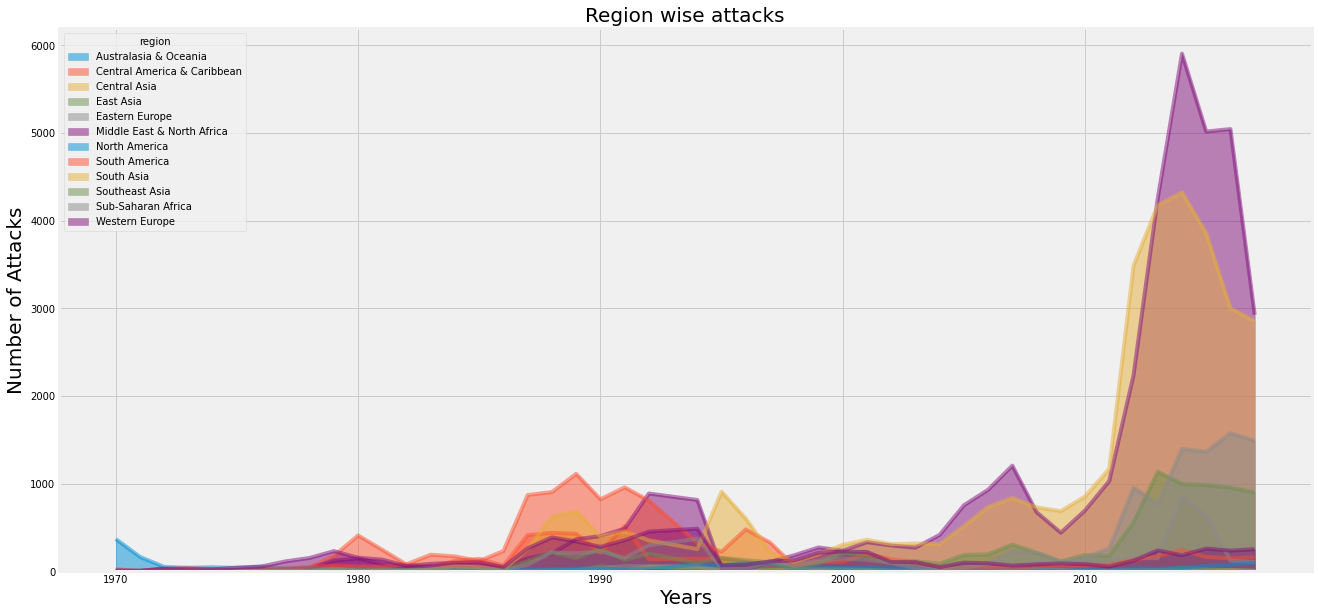

In [96]:
reg=pd.crosstab(df.year,df.region)
reg.plot(kind="area", stacked=False, alpha=0.5,figsize=(20,10))
plt.title("Region wise attacks",fontsize=20)
plt.xlabel("Years",fontsize=20)
plt.ylabel("Number of Attacks",fontsize=20)
plt.show()

**Insight:** Maximum attacked on the region was Middle East & North Africa.

**Maximum attack by which terrorist group**

In [97]:
print('Maximum attack by terrorist group:', df['terrorist_group'].value_counts().index[1])
df['terrorist_group']

Maximum attack by terrorist group: Taliban


1                 23rd of September Communist League
2                                            Unknown
5                                 Black Nationalists
6                                Tupamaros (Uruguay)
7                                            Unknown
                             ...                    
181685                                       Unknown
181686                                    Al-Shabaab
181687                             Muslim extremists
181688    Bangsamoro Islamic Freedom Movement (BIFM)
181689                                       Unknown
Name: terrorist_group, Length: 120282, dtype: category
Categories (2575, object): ['1 May', '14th of December Command',
                            '16 January Organization for the Liberation of..., '1920 Revolution Brigades', ..., 'Zulu Miners',
                            'Zuwar al-Imam Rida', 'Zviadists', 'leftist guerrillas-Bolivarian militia']

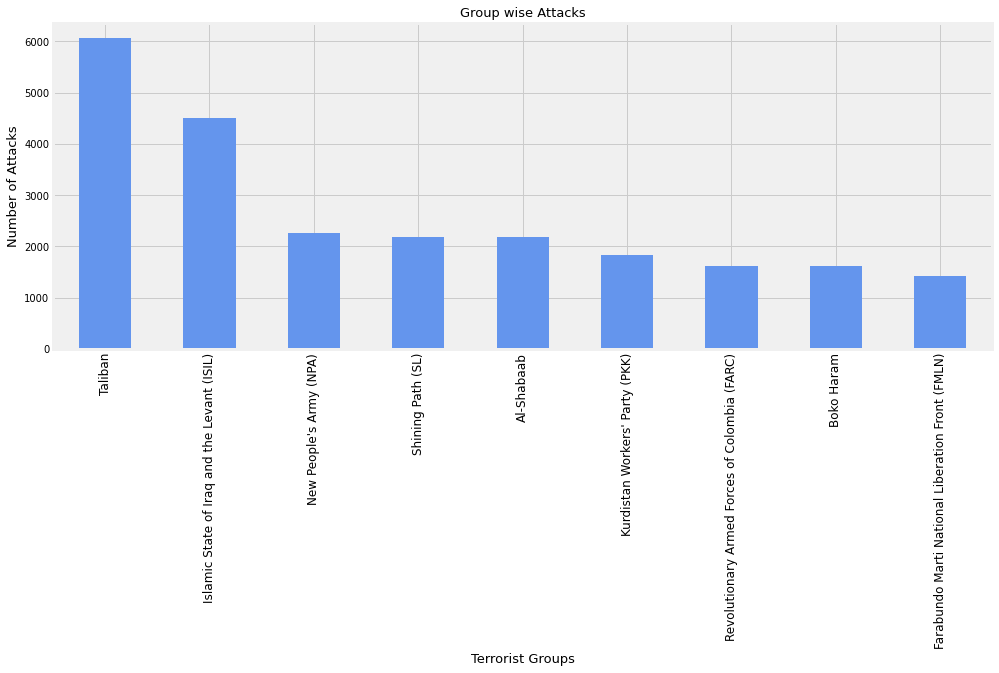

In [98]:
grp=df["terrorist_group"].value_counts()[1:10]
grp
grp.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Group wise Attacks",fontsize=13)
plt.xlabel("Terrorist Groups",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()

**Insight:** Most of the attacked was done by Taliban terrorist group.

**Maximum attack on the basis of Year**

In [99]:
print('Attacks happened most in the year:', df['year'].value_counts().index[0])
df['year'].value_counts().index[0]

Attacks happened most in the year: 2014


2014

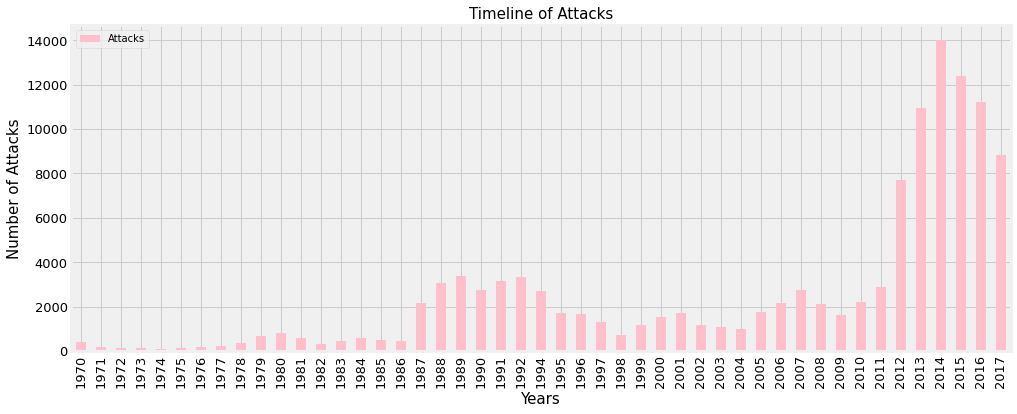

In [100]:
attack_type=df["year"].value_counts(dropna=False).sort_index().to_frame().reset_index().rename(columns={"index":"year","year":"Attacks"}).set_index("year")
attack_type.plot(kind="bar",color="pink",figsize=(15,6),fontsize=13)
plt.title("Timeline of Attacks",fontsize=15)
plt.xlabel("Years",fontsize=15)
plt.ylabel("Number of Attacks",fontsize=15)
plt.show()

**Insight:** In the year 2014 most of the attacked had happened.

**Maximum attack on the basis of month.**

In [101]:
print('Maximum attack in the month:', df['month'].value_counts().index[0])
df['month']

Maximum attack in the month: 5


1          0
2          1
5          1
6          1
7          1
          ..
181685    12
181686    12
181687    12
181688    12
181689    12
Name: month, Length: 120282, dtype: int64

<function matplotlib.pyplot.show>

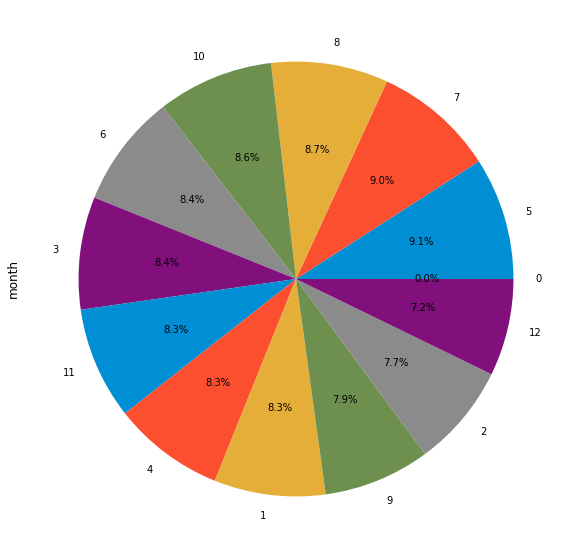

In [102]:
#data visualization
plt.figure(figsize=(10,10))
df['month'].value_counts().plot(kind = 'pie' , autopct ="%.1f%%")
plt.show

**Insight:** In the month of May most attacked had happened.

**Maximum attack on the basis of date**

In [103]:
print('Maximum attack on the date:', df['day'].value_counts().index[0])
df['day']

Maximum attack on the date: 15


1          0
2          0
5          1
6          2
7          2
          ..
181685    31
181686    31
181687    31
181688    31
181689    31
Name: day, Length: 120282, dtype: int64

<function matplotlib.pyplot.show>

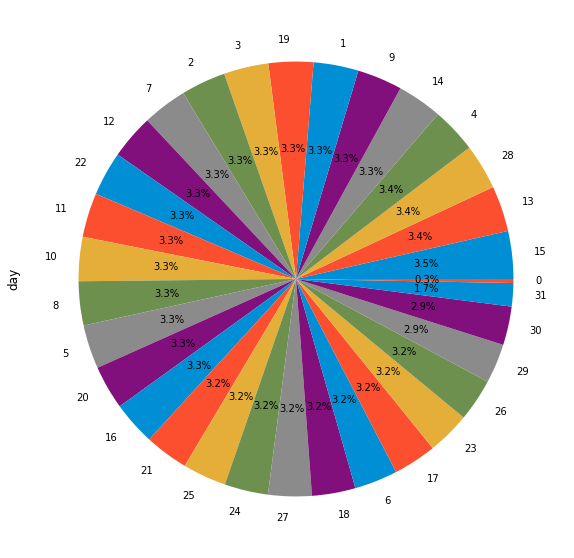

In [104]:
# Data Visualization
plt.figure(figsize=(10,10))
df['day'].value_counts().plot(kind = 'pie' , autopct ="%.1f%%")
plt.show

**Insight:** On the date 15 had maximum number of attacked.

**Bivariate Variable Analysis**

**People killed in each region**

In [105]:
rk=df[["region","killed"]].groupby("region").sum().sort_values(by="killed",ascending=False)
rk

,killed
region,
Middle East & North Africa,95950
South Asia,76421
Sub-Saharan Africa,44034
South America,15976
Southeast Asia,10820
Central America & Caribbean,7926
Eastern Europe,5459
North America,4151
Western Europe,3116


**People Wounded in each region**

In [106]:
rw=df[["region","wounded"]].groupby("region").sum().sort_values(by="wounded",ascending=False)
rw

,wounded
region,
Middle East & North Africa,171536
South Asia,113861
Sub-Saharan Africa,42672
North America,20126
Southeast Asia,18761
South America,11102
Eastern Europe,10177
Western Europe,10173
East Asia,7942


Text(0, 0.5, 'Number of People Wounded')

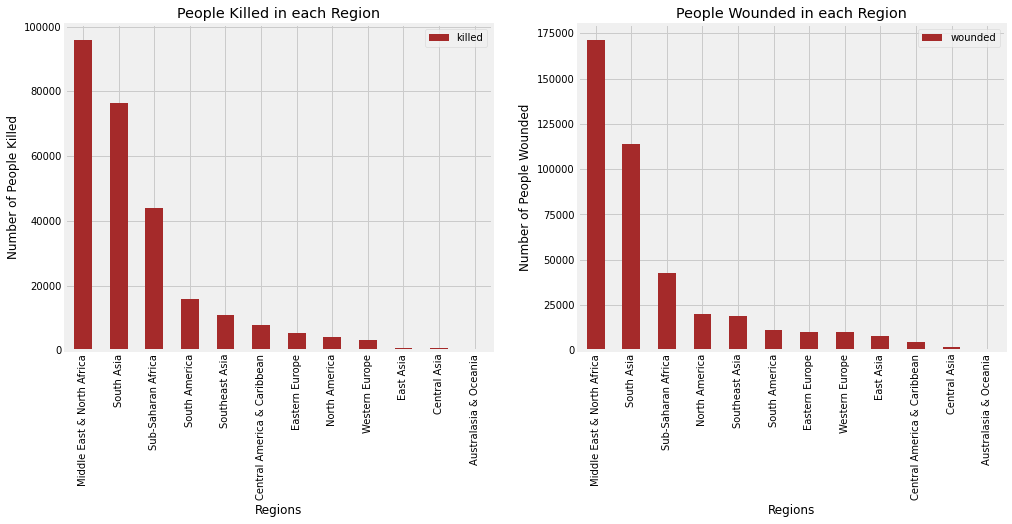

In [107]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Killed
rk.plot(kind="bar",color="brown",figsize=(15,6),ax=ax0)
ax0.set_title("People Killed in each Region")
ax0.set_xlabel("Regions")
ax0.set_ylabel("Number of People Killed")

#wounded
rw.plot(kind="bar",color="brown",figsize=(15,6),ax=ax1)
ax1.set_title("People Wounded in each Region")
ax1.set_xlabel("Regions")
ax1.set_ylabel("Number of People Wounded")

**What are the major sub targeted areas under each target**

In [108]:
a = df
a = a[['target','sub_target']].value_counts()
a

target                        sub_target                                             
Police                        Police Security Forces/Officers                            9729
Private Citizens & Property   Unnamed Civilian/Unspecified                               7222
Military                      Military Personnel (soldiers, troops, officers, forces)    6459
Government (General)          Government Personnel (excluding police, military)          5607
Military                      Military Unit/Patrol/Convoy                                5517
                                                                                         ... 
Government (General)          Medical/Pharmaceutical                                        2
Military                      Alleged Informant                                             1
Government (General)          Private Security Company/Firm                                 1
                              Named Civilian                        

**Data Visualization**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


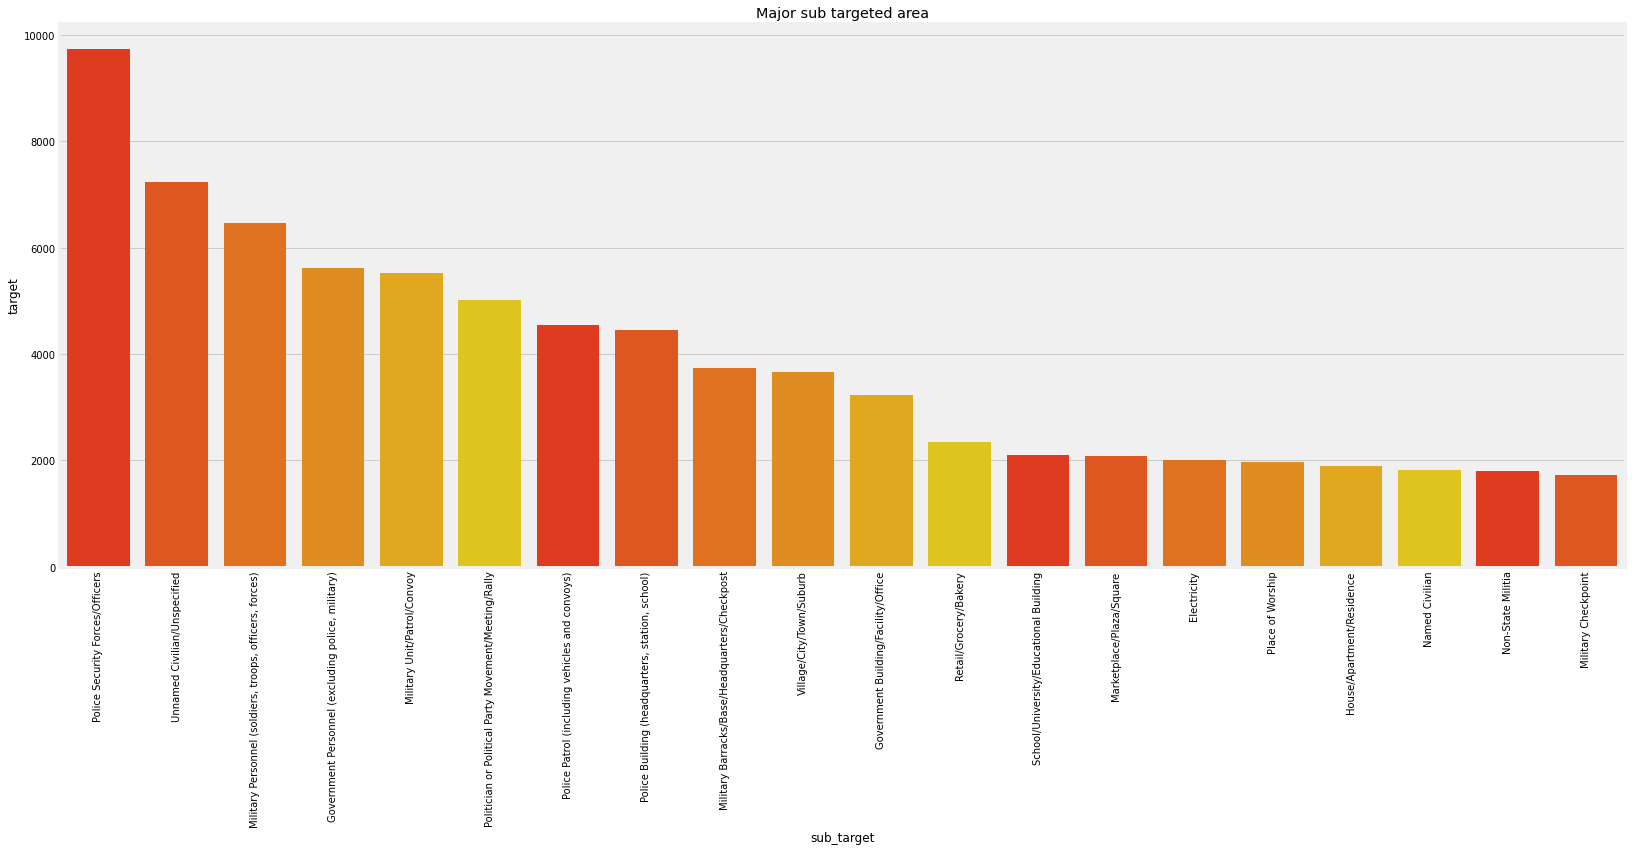

In [109]:
plt.figure(figsize = (25,10))
sns.countplot(df['sub_target'],
              order = df['sub_target'].value_counts().index[:20],
              palette = sns.color_palette("autumn"))
plt.xlabel('sub_target')
plt.ylabel('target')
plt.title('Major sub targeted area')
plt.xticks(rotation = 90)
plt.show()

**Success rate according to the attack type.**

In [110]:
#Let's identify success rate according to the attack type
df.groupby('attack_type')['success'].mean()*100

attack_type
Armed Assault                          93.323323
Assassination                          72.072194
Bombing/Explosion                      91.168721
Facility/Infrastructure Attack         94.863388
Hijacking                              88.671024
Hostage Taking (Barricade Incident)    98.814229
Hostage Taking (Kidnapping)            96.891849
Unarmed Assault                        84.203481
Unknown                                78.770100
Name: success, dtype: float64

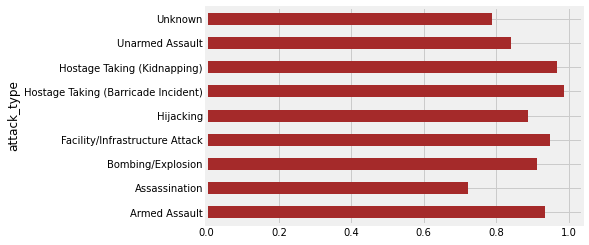

In [111]:
df.groupby('attack_type')['success'].mean().plot(kind = "barh", color = "brown")

**How much success on the basis of killed people**

In [112]:
yw=df[["year","wounded"]].groupby("year").sum().sort_values(by="wounded",ascending=False)
yw

,wounded
year,
2015,43693
2014,40733
2016,39595
2013,37568
2012,25253
2017,24605
2001,22464
2007,20893
2006,11992


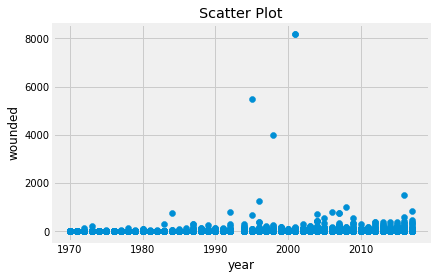

In [113]:
plt.scatter(df['year'], df['wounded'],alpha=1)  # alpha chances the transparency
#Adding the aesthetics
plt.title('Scatter Plot')
plt.xlabel('year')
plt.ylabel('wounded')
#Show the plot
plt.show()

**Maximum success rate on the basis of target type.**

In [114]:
def success_rate(target_type):
  success_count = df[(df['success'] == 1) &  (df['target'] == target_type)].shape[0]    
  attack_count = df[df['target']==target_type].shape[0]
  rate = (success_count/attack_count)*100
  return rate 

 

In [115]:
diction = {'target':[],'success_rate':[]}
for target_type in list(df['target'].unique()):
  rate = success_rate(target_type)
  diction['target'].append(target_type)
  diction['success_rate'].append(rate)
new = pd.DataFrame(diction)
new = new.nlargest(n=10, columns=['success_rate'])
new                    

,target,success_rate
20,Tourists,94.247788
3,Utilities,94.091182
13,NGO,93.459302
14,Telecommunication,93.346380
17,Other,93.333333
10,Private Citizens & Property,92.425589
7,Business,92.357930
16,Terrorists/Non-State Militia,92.218543
11,Religious Figures/Institutions,91.638383
2,Police,90.372596


**Data Visualization**

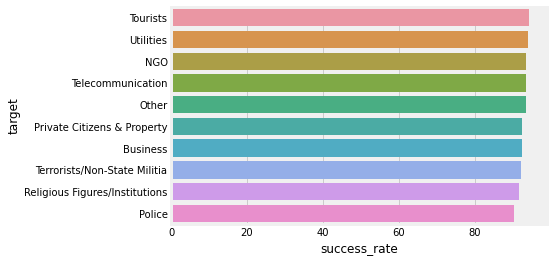

In [116]:
sns.barplot(y=new['target'],x=new['success_rate'])

**Total number of people wounded in each country**

In [117]:
cnw=df[["country","wounded"]].groupby("country").sum().sort_values(by="wounded",ascending=False)
cnw.head(10)

,wounded
country,
Iraq,112195
Afghanistan,39970
Pakistan,32288
India,21516
United States,19514
Syria,13658
Sri Lanka,11811
Nigeria,9527
Yemen,8965


**Total number of people killed in each country**

In [118]:
cnk=df[["country","killed"]].groupby("country").sum().sort_values(by="killed",ascending=False)
cnk.head(10)

,killed
country,
Iraq,60253
Afghanistan,32399
Pakistan,17850
India,13499
Nigeria,10898
Sri Lanka,10513
Colombia,8388
Syria,7168
Somalia,7146


Text(0, 0.5, 'Number of People Wounded')

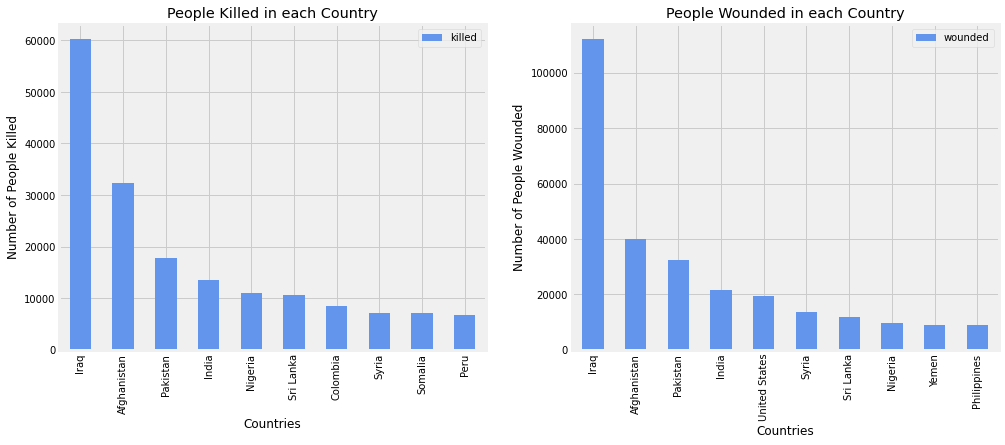

In [119]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Killed
cnk[:10].plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax0)
ax0.set_title("People Killed in each Country")
ax0.set_xlabel("Countries")
ax0.set_ylabel("Number of People Killed")

#Wounded
cnw[:10].plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax1)
ax1.set_title("People Wounded in each Country")
ax1.set_xlabel("Countries")
ax1.set_ylabel("Number of People Wounded")

**Correlation Analysis**

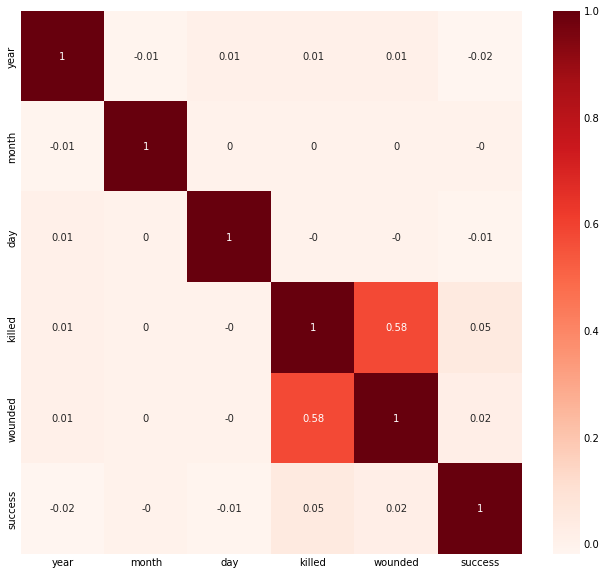

In [120]:
#This shows how much related is one parameter to the other in the dataset. 
plt.figure(figsize=(10,10))
sns.heatmap(np.round(df.corr(),2),annot=True, cmap= 'Reds')

**Multivariate Analysis**

**Total number of people killed in each country by terrorist group**

In [121]:
gck=df[["terrorist_group","country","killed"]].groupby(["terrorist_group","country"],axis=0).sum().sort_values(by="killed",ascending=False).drop("Unknown").head(10)
gck

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


,,killed
terrorist_group,country,
Taliban,Afghanistan,24540
Islamic State of Iraq and the Levant (ISIL),Iraq,23262
Boko Haram,Nigeria,8403
Liberation Tigers of Tamil Eelam (LTTE),Sri Lanka,8366
Shining Path (SL),Peru,5894
Al-Shabaab,Somalia,5705
Tehrik-i-Taliban Pakistan (TTP),Pakistan,4212
Kurdistan Workers' Party (PKK),Turkey,4123
Al-Qaida in Iraq,Iraq,3435


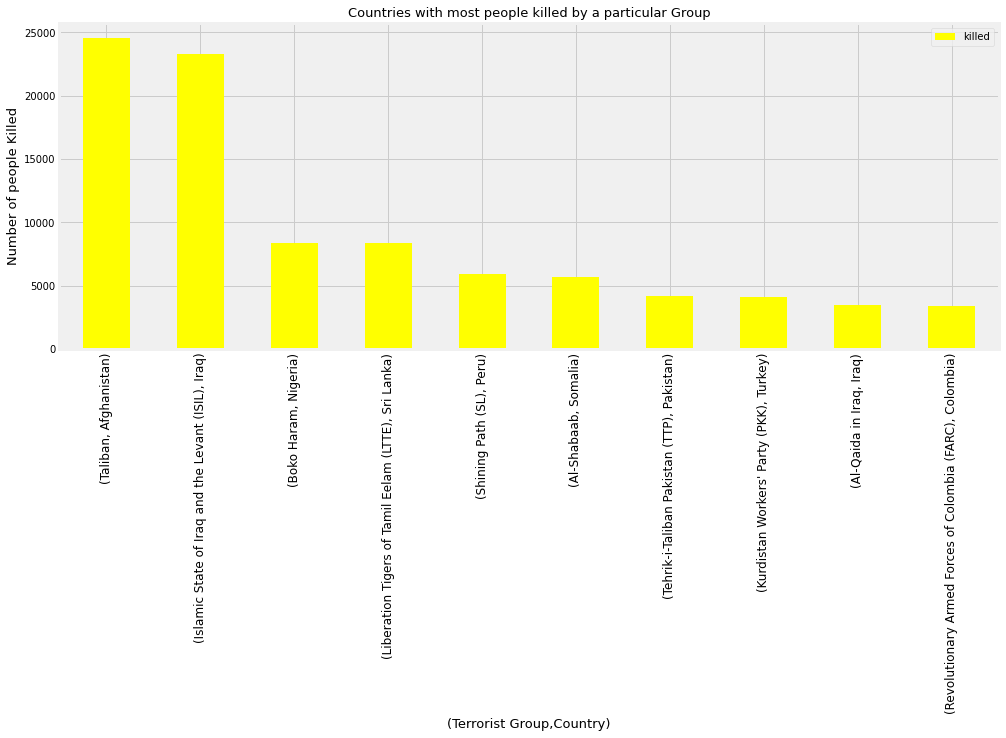

In [122]:
gck.plot(kind="bar",color="yellow",figsize=(15,6))
plt.title("Countries with most people killed by a particular Group",fontsize=13)
plt.xlabel("(Terrorist Group,Country)",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of people Killed",fontsize=13)
plt.show()

**Conclusion:**

1. The data consists of terrorist activities ranging from the year 1970 to 2017
2. Maximum number of people killed were: 151.0000000
3. Maximum number of people wounded were: 150.000000
4. Least number of people killed were:173 in 1971
5. Least number of people wounded were:82 in 1971
6. Most number of attacked: 7586 in the city "Baghdad"
7. Most sub targeted area was: police security forces/officers
8. Average success rate of attack was:89.36
9. Most number of attacks:18882 in "Iraq"
10. Most number of attcaks by the weapon:"Bombing/Explosives" 60550
11. Least number of attacks by the weapon:"Hijacking"
11. Country had most attacked:Iraq  19291
12. Most targeted area was: "Private citizens and property"
13. Least targeted area was: "Abortion related"
14. Region had most attacked:"Middle East & North Africa"  37262
15. Region had least number of attacked:"Australasia & Oceania"
16. Most number of attacks by the group: "Taliban"
17. Most number of attacks happened in the year 2014
18. Month had most number of attacked:"May"
19. Month had least number of attacked:"December"
20. Maximum success rate on the basis of target:
 94.247788 over "Tourists".
22. Region in which most number of people killed: 137642 in "Middle East & North Africa"
23. Region where Least number of people killed: 150 in "Australasia & Oceania"
24. Country where most number of people killed: 78589 in "Iraq"
25. Country where Least number of people killed: 12053 in "El Salvador"
26. Most number of people killed : 24540 by "Taliban" in "Afghanistan".
27. Maximum number of people wounded in the year:2015.

**Challenges**


* Difficult to analyze column like success,region.
* Need to plot a accurate graph to understand the data.
* There is difficult to find relationship between different columns.





